# Library

In [1]:
import torch
import torchvision
from torchvision.datasets import FashionMNIST # torchvision for image datasets
from torchtext.datasets import AmazonReviewFull # torchtext for text
from torchaudio.datasets import SPEECHCOMMANDS #torchaudio for audio
import numpy as np

c:\Users\hasan\anaconda3\envs\Pytorch\lib\site-packages\torchaudio\backend\utils.py:74: UserWarning: No audio backend is available.
  warnings.warn("No audio backend is available.")


# Tensor

In [2]:
A = [[6, 9, 2],
     [3, 3, 7],
     [1, 0, 3]]
     
A_tensor = torch.tensor(A)
A_tensor

tensor([[6, 9, 2],
        [3, 3, 7],
        [1, 0, 3]])

In [3]:
B = np.array([0,1,2,3])
B_tensor = torch.from_numpy(B)
B_tensor

tensor([0, 1, 2, 3], dtype=torch.int32)

In [4]:
# with no dtype argument, torch will infer the type
C = torch.zeros(4,4) 

C

tensor([[0., 0., 0., 0.],
        [0., 0., 0., 0.],
        [0., 0., 0., 0.],
        [0., 0., 0., 0.]])

In [5]:
D = torch.ones(3,3,2, dtype=torch.int)

D

tensor([[[1, 1],
         [1, 1],
         [1, 1]],

        [[1, 1],
         [1, 1],
         [1, 1]],

        [[1, 1],
         [1, 1],
         [1, 1]]], dtype=torch.int32)

In [6]:
A_tensor_zeros = torch.zeros_like(A_tensor)

A_tensor_zeros 

tensor([[0, 0, 0],
        [0, 0, 0],
        [0, 0, 0]])

In [7]:
# the dtype argument allows you to explicitly specify the datatype of the tensor
A_tensor_rand = torch.rand_like(A_tensor, dtype=torch.float) 

A_tensor_rand

tensor([[0.5402, 0.7299, 0.1359],
        [0.7315, 0.0059, 0.1360],
        [0.0044, 0.2612, 0.4128]])

In [8]:
A_tensor_rand.dtype
# torch.float32

torch.float32

In [9]:
A_tensor_rand.shape
# torch.Size([3, 3])

torch.Size([3, 3])

In [10]:
A_tensor_rand.device
# device(type='cpu')

device(type='cpu')

# Dataset

In [11]:
training_data = FashionMNIST(
    # the directory you want to store the dataset, can be a string e.g. "data"
    root = 'D:\Clone Repo\Pytorch-Self-Paced\Week 1 -  Introduction to Pytorch\data', 
    # if set to False, will give you the test set instead
    train = True, 
    # download the dataset if it's not already available in the root path you specified
    download = True, 
    # as the name implies, will transform images to tensor data structures so PyTorch can use them for training
    transform = torchvision.transforms.ToTensor() 
)

100%|██████████| 26421880/26421880 [00:17<00:00, 1527478.48it/s]


Extracting D:\Clone Repo\Pytorch-Self-Paced\Week 1 -  Introduction to Pytorch\data\FashionMNIST\raw\train-images-idx3-ubyte.gz to D:\Clone Repo\Pytorch-Self-Paced\Week 1 -  Introduction to Pytorch\data\FashionMNIST\raw



100%|██████████| 29515/29515 [00:00<00:00, 112803.43it/s]


Extracting D:\Clone Repo\Pytorch-Self-Paced\Week 1 -  Introduction to Pytorch\data\FashionMNIST\raw\train-labels-idx1-ubyte.gz to D:\Clone Repo\Pytorch-Self-Paced\Week 1 -  Introduction to Pytorch\data\FashionMNIST\raw



100%|██████████| 4422102/4422102 [00:03<00:00, 1263992.93it/s]


Extracting D:\Clone Repo\Pytorch-Self-Paced\Week 1 -  Introduction to Pytorch\data\FashionMNIST\raw\t10k-images-idx3-ubyte.gz to D:\Clone Repo\Pytorch-Self-Paced\Week 1 -  Introduction to Pytorch\data\FashionMNIST\raw



100%|██████████| 5148/5148 [00:00<00:00, 5184220.17it/s]

Extracting D:\Clone Repo\Pytorch-Self-Paced\Week 1 -  Introduction to Pytorch\data\FashionMNIST\raw\t10k-labels-idx1-ubyte.gz to D:\Clone Repo\Pytorch-Self-Paced\Week 1 -  Introduction to Pytorch\data\FashionMNIST\raw



In [12]:
training_data.classes
# ['T-shirt/top',
# 'Trouser',
# 'Pullover',
# 'Dress',
# 'Coat',
# 'Sandal',
# 'Shirt',
# 'Sneaker',
# 'Bag',
# 'Ankle boot']

['T-shirt/top',
 'Trouser',
 'Pullover',
 'Dress',
 'Coat',
 'Sandal',
 'Shirt',
 'Sneaker',
 'Bag',
 'Ankle boot']

In [13]:
training_data.class_to_idx # get the corresponding index with each class
# {'Ankle boot': 9,
# 'Bag': 8,
# 'Coat': 4,
# 'Dress': 3,
# 'Pullover': 2,
# 'Sandal': 5,
# 'Shirt': 6,
# 'Sneaker': 7,
# 'T-shirt/top': 0,
# 'Trouser': 1}

{'T-shirt/top': 0,
 'Trouser': 1,
 'Pullover': 2,
 'Dress': 3,
 'Coat': 4,
 'Sandal': 5,
 'Shirt': 6,
 'Sneaker': 7,
 'Bag': 8,
 'Ankle boot': 9}

# CIFAR10

In [14]:
import torch
from torch import nn
from torch.utils.data import DataLoader
from torchvision.utils import make_grid
from torchvision.datasets import CIFAR10
from torchvision.transforms import ToTensor
from torchvision.transforms import Normalize, Compose
import os
import matplotlib.pyplot as plt
import numpy as np

## Loading the dataset

In [15]:
transform = Compose(
    [ToTensor(),
     Normalize((0.5, 0.5, 0.5),  # mean
               (0.5, 0.5, 0.5))] # std. deviation
)

In [16]:
training_data = CIFAR10(root="cifar",
                        train = True, # train set, 50k images
                        download = True,
                        transform=transform)
test_data = CIFAR10(root = "cifar",
                    train = False, # test set, 10k images
                    download = True,
                    transform = transform)

100%|██████████| 170498071/170498071 [01:40<00:00, 1695966.64it/s]


Extracting cifar\cifar-10-python.tar.gz to cifar
Files already downloaded and verified


In [17]:
batch_size = 4
train_dataloader = DataLoader(training_data, 
                              batch_size=batch_size, 
                              shuffle=True)
test_dataloader = DataLoader(test_data, 
                             batch_size=batch_size, 
                             shuffle=True)

In [18]:
for X, y in train_dataloader:
  print(f"Shape of X [N, C, H, W]: {X.shape}")
  print(f"Shape of y: {y.shape} {y.dtype}")
  break
# Shape of X [N, C, H, W]: torch.Size([4, 3, 32, 32])
# Shape of y: torch.Size([4]) torch.int64

Shape of X [N, C, H, W]: torch.Size([4, 3, 32, 32])
Shape of y: torch.Size([4]) torch.int64


In [19]:
def imshow(img):
  img = img / 2 + .05 # revert normalization for viewing
  npimg = img.numpy()
  plt.imshow(np.transpose(npimg, (1,2,0)))
  plt.show()
  
classes = training_data.classes
training_data.classes

['airplane',
 'automobile',
 'bird',
 'cat',
 'deer',
 'dog',
 'frog',
 'horse',
 'ship',
 'truck']

## Defining the Base Model

In [22]:
device = "cuda" if torch.cuda.is_available() else "cpu"
print(f"Device: {device}")

Device: cuda


In [23]:
class NeuralNetwork(nn.Module):
    def __init__(self):
        super(NeuralNetwork, self).__init__()
        self.flatten = nn.Flatten()
        self.linear_relu_stack = nn.Sequential(
            nn.Linear(32*32*3, 1024),
            nn.ReLU(),
            nn.Linear(1024, 512),
            nn.ReLU(),
            nn.Linear(512, 10)
        )
    def forward(self, x):
        x = self.flatten(x)
        logits = self.linear_relu_stack(x)
        return logits
        
model = NeuralNetwork().to(device)

print(model)

NeuralNetwork(
  (flatten): Flatten(start_dim=1, end_dim=-1)
  (linear_relu_stack): Sequential(
    (0): Linear(in_features=3072, out_features=1024, bias=True)
    (1): ReLU()
    (2): Linear(in_features=1024, out_features=512, bias=True)
    (3): ReLU()
    (4): Linear(in_features=512, out_features=10, bias=True)
  )
)


## Loss function and Optimizer

In [24]:
loss_fn = nn.CrossEntropyLoss()
optimizer = torch.optim.SGD( model.parameters(), lr=0.001 ) # momentum=0.9

## Defining the Training Loop and Backpropagation and Training Progress Output

In [25]:
def train(dataloader, model, loss_fn, optimizer):
    size = len(dataloader.dataset)
    model.train()
    for batch, (X, y) in enumerate(dataloader):
        X, y = X.to(device), y.to(device)
        # Compute prediction error
        pred = model(X)
        loss = loss_fn(pred, y)
        # Backpropagation
        optimizer.zero_grad()
        loss.backward()
        optimizer.step()
        if batch % 2000 == 0:
            loss, current = loss.item(), batch * len(X)
            print(f"loss: {loss:>7f}  [{current:>5d}/{size:>5d}]")

## Defining the Testing Method 

In [26]:
def test(dataloader, model, loss_fn):
    size = len(dataloader.dataset)
    num_batches = len(dataloader)
    model.eval()
    test_loss, correct = 0, 0
    with torch.no_grad():
        for X, y in dataloader:
            X, y = X.to(device), y.to(device)
            pred = model(X)
            test_loss += loss_fn(pred, y).item()
            correct += (pred.argmax(1) == y).type(torch.float).sum().item()
    test_loss /= num_batches
    correct /= size
    print(f"Test Error: \n Accuracy: {(100*correct):>0.1f}%, Avg loss: {test_loss:>8f} \n")

## Training Model

In [27]:
epochs = 10
for t in range(epochs):
    print(f"Epoch {t+1}\n-------------------------------")
    train(train_dataloader, model, loss_fn, optimizer)
    test(test_dataloader, model, loss_fn)
print("Done!")

Epoch 1
-------------------------------
loss: 2.304004  [    0/50000]
loss: 2.182862  [ 8000/50000]
loss: 2.140388  [16000/50000]
loss: 1.477777  [24000/50000]
loss: 1.145723  [32000/50000]
loss: 1.666813  [40000/50000]
loss: 1.740497  [48000/50000]
Test Error: 
 Accuracy: 39.4%, Avg loss: 1.713888 

Epoch 2
-------------------------------
loss: 2.469156  [    0/50000]
loss: 1.433014  [ 8000/50000]
loss: 1.353728  [16000/50000]
loss: 1.653767  [24000/50000]
loss: 0.909968  [32000/50000]
loss: 0.884430  [40000/50000]
loss: 1.382427  [48000/50000]
Test Error: 
 Accuracy: 44.7%, Avg loss: 1.569790 

Epoch 3
-------------------------------
loss: 0.937054  [    0/50000]
loss: 1.689824  [ 8000/50000]
loss: 1.197342  [16000/50000]
loss: 1.910531  [24000/50000]
loss: 0.516422  [32000/50000]
loss: 1.482382  [40000/50000]
loss: 1.931607  [48000/50000]
Test Error: 
 Accuracy: 47.7%, Avg loss: 1.489985 

Epoch 4
-------------------------------
loss: 1.372599  [    0/50000]
loss: 1.033860  [ 8000/5

## Saving and Loading a Model

In [28]:
torch.save(model.state_dict(), "cifar_fc.pth")

In [29]:
model = NeuralNetwork()
model.load_state_dict(torch.load("cifar_fc.pth"))

<All keys matched successfully>

## Evaluating the Model

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


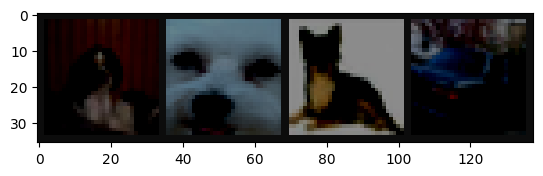

Ground Truth:  dog   dog   dog   automobile


In [31]:
dataiter = iter(test_dataloader)
images, labels = next(dataiter)

imshow(make_grid(images))
print('Ground Truth: ', ' '.join(f'{classes[labels[j]]:5s}' for j in range(4)))

In [32]:
outputs = model(images)
_, predicted = torch.max(outputs, 1)

print('Predicted: ', ' '.join(f'{classes[predicted[j]]:5s}' for j in range(4)))
# Predicted:  dog   ship  automobile deer

Predicted:  dog   airplane airplane automobile


In [33]:
correct = 0
total = 0

with torch.no_grad():
   for data in test_dataloader:
     images, labels = data
     outputs = model(images)
     _, predicted = torch.max(outputs.data, 1)
     total += labels.size(0)
     correct += (predicted == labels).sum().item()
     
print(f'Model accuracy: {100 * correct // total} %')

Model accuracy: 54 %


## classifying each class

In [34]:
correct_pred = {classname: 0 for classname in classes}
total_pred = {classname: 0  for classname in classes}

with torch.no_grad():
  for data in test_dataloader:
    images, labels = data
    outputs = model(images)
    _, predictions = torch.max(outputs, 1)
    for label,prediction in zip(labels, predictions):
      if label == prediction:
        correct_pred[classes[label]] += 1
      total_pred[classes[label]] += 1

for classname, correct_count in correct_pred.items():
  accuracy = 100 * float(correct_count) / total_pred[classname]
  print(f'Accuracy for class {classname:5s}: {accuracy:.1f}%')

Accuracy for class airplane: 63.0%
Accuracy for class automobile: 67.7%
Accuracy for class bird : 48.3%
Accuracy for class cat  : 32.7%
Accuracy for class deer : 48.4%
Accuracy for class dog  : 42.7%
Accuracy for class frog : 57.7%
Accuracy for class horse: 60.3%
Accuracy for class ship : 67.1%
Accuracy for class truck: 58.6%
